In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn

df = pd.read_csv('data/leaves_clean.csv')
df = df.rename(columns={'Employee_No': 'Employee_Code',
                                      'leave_date': 'Leave_Date',
                                      'Type': 'Leave_Factor',
                                      'Applied Date': 'Applied_Date',
                                      'leave_leave_date': 'Lieu_Leave_Date',
                                      'Remarks': 'Remarks',
                                      'apply_type': 'Leave_Category'})
df['Leave_Category'].unique()

array(['Anual', 'Casual', 'Curfew', 'Liue Leave', 'Medical Leave',
       'No Pay', 'Powercut', 'Sat Holiday', 'Short Leave',
       'Special Leave', 'WFH'], dtype=object)

<Axes: >

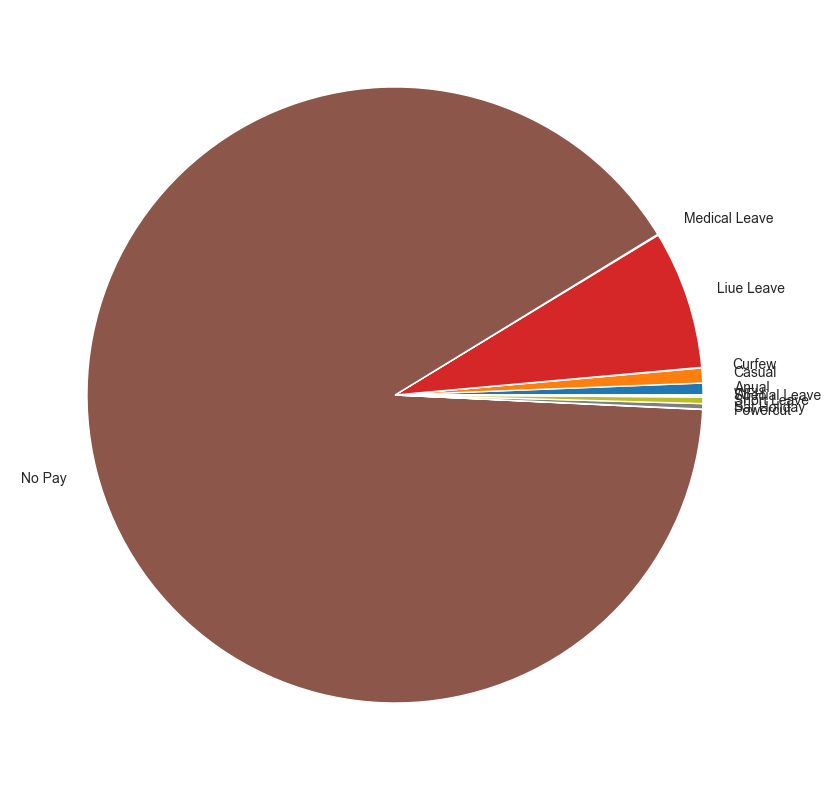

In [20]:
group = df.groupby(["Leave_Category"]).size()

group.plot.pie(figsize=(10,10))

In [21]:
df.head()

,Employee_Code,Leave_Date,Leave_Factor,Applied_Date,Lieu_Leave_Date,Remarks,Leave_Category
0,347,2020-01-29,Half Day,2022-01-04 15:33:36,\N,\N,Anual
1,347,2020-01-29,Half Day,2022-01-04 15:33:45,\N,\N,Anual
2,347,2020-01-29,Half Day,2022-01-04 15:36:35,\N,\N,Anual
3,347,2020-01-29,Half Day,2022-01-04 15:36:45,\N,\N,Anual
4,347,2020-01-29,Half Day,2022-01-04 18:02:42,\N,\N,Anual


In [22]:
df.dtypes

Employee_Code       int64
Leave_Date         object
Leave_Factor       object
Applied_Date       object
Lieu_Leave_Date    object
Remarks            object
Leave_Category     object
dtype: object

In [23]:
df['Applied_Date']

0        2022-01-04 15:33:36
1        2022-01-04 15:33:45
2        2022-01-04 15:36:35
3        2022-01-04 15:36:45
4        2022-01-04 18:02:42
                ...         
76438    2022-03-07 18:59:16
76439    2022-03-07 18:59:16
76440    2022-03-07 18:59:16
76441    2022-03-07 18:59:17
76442    2022-07-22 10:45:11
Name: Applied_Date, Length: 76443, dtype: object

In [24]:
from datetime import datetime
f_date = lambda x: datetime.strptime(x, '%Y-%m-%d')
f_date_time = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
df.Leave_Date =  df.Leave_Date.apply(f_date)
df.Applied_Date = pd.to_datetime(df['Applied_Date'], errors="coerce")

df.head(100)

,Employee_Code,Leave_Date,Leave_Factor,Applied_Date,Lieu_Leave_Date,Remarks,Leave_Category
0,347,2020-01-29,Half Day,2022-01-04 15:33:36,\N,\N,Anual
1,347,2020-01-29,Half Day,2022-01-04 15:33:45,\N,\N,Anual
2,347,2020-01-29,Half Day,2022-01-04 15:36:35,\N,\N,Anual
3,347,2020-01-29,Half Day,2022-01-04 15:36:45,\N,\N,Anual
4,347,2020-01-29,Half Day,2022-01-04 18:02:42,\N,\N,Anual
...,...,...,...,...,...,...,...
95,1657,2022-01-31,Full Day,2022-03-07 19:00:33,\N,personal,Anual
96,1212,2022-02-24,Half Day,2022-03-07 19:00:34,\N,PERSONAL,Anual
97,556,2022-03-03,Full Day,2022-03-07 19:00:41,\N,personal,Anual
98,1308,2022-02-07,Full Day,2022-03-09 09:06:48,\N,Personal,Anual


In [25]:
df["inform date"]=(df["Leave_Date"] - df["Applied_Date"])

df["inform date"].describe()

count                           76380
mean     -44 days +23:56:46.141935062
std       156 days 07:47:14.531133046
min               -707 days +05:57:18
25%         -51 days +12:55:57.750000
50%                -36 days +12:55:53
75%         -25 days +13:54:05.750000
max               29780 days 19:30:00
Name: inform date, dtype: object

In [26]:
df["Inform_date"] = df["inform date"].dt.days

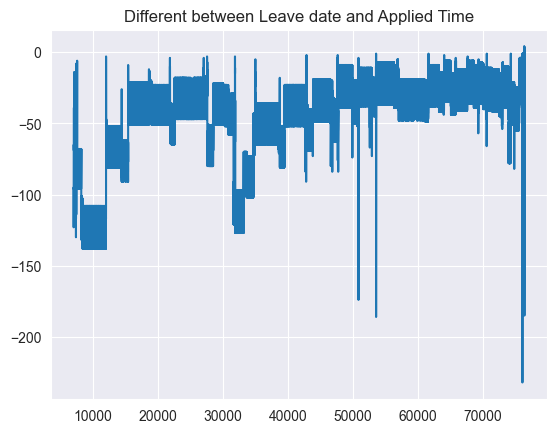

In [27]:
import matplotlib.pyplot as plt


df.Inform_date.describe
series  = pd.Series(df.iloc[7000:].Inform_date);


series.plot.line(title="Different between Leave date and Applied Time");

plt.show(block=True)

In [28]:
#Leave count not early informed  ( Applied_Date After Leave_Date)
df[df['Inform_date'] < 0].groupby("Leave_Category").size()

Leave_Category
Anual              449
Casual             574
Curfew              23
Liue Leave        5544
Medical Leave       35
No Pay           69128
Powercut            16
Sat Holiday        216
Short Leave        261
Special Leave       31
WFH                 19
dtype: int64

In [29]:
#Leave count with early informed  (Leave_Date After Applied_Date)
df[df['Inform_date'] > 0].groupby("Leave_Category").size()

Leave_Category
Anual            16
Casual           20
Liue Leave        4
Special Leave    30
dtype: int64

In [30]:
#As per the above date all the no pay leaves are not informed early